In [105]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pickle


## loading the datasets from csv files 

In [170]:
movies = pd.read_csv("artifacts/tmdb_5000_movies.csv")
credits = pd.read_csv("artifacts/tmdb_5000_credits.csv")

In [108]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [109]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Performing EDA on  data 

In [172]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [173]:
movies.shape

(4803, 20)

In [174]:
credits.shape

(4803, 4)

### # merging both dataframes

In [176]:

movies = movies.merge(credits, on='title')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [113]:
# To prevent truncation:

# pd.set_option('display.max_colwidth', None) 
# To revert

# pd.reset_option('display.max_colwidth')


In [115]:
movies[["title", "vote_average", "revenue", "popularity"]].sort_values(by="revenue",ascending=False)

,title,vote_average,revenue,popularity
0,Avatar,7.2,2787965087,150.437577
25,Titanic,7.5,1845034188,100.025899
16,The Avengers,7.4,1519557910,144.448633
28,Jurassic World,6.5,1513528810,418.708552
44,Furious 7,7.3,1506249360,102.322217
...,...,...,...,...
3213,Star Wars: Clone Wars: Volume 1,8.0,0,1.881466
3210,Beneath Hill 60,7.3,0,3.949796
3209,The I Inside,5.9,0,3.789485
3208,"Ultramarines: A Warhammer 40,000 Movie",5.2,0,3.891186


In [177]:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

<Axes: ylabel='count'>

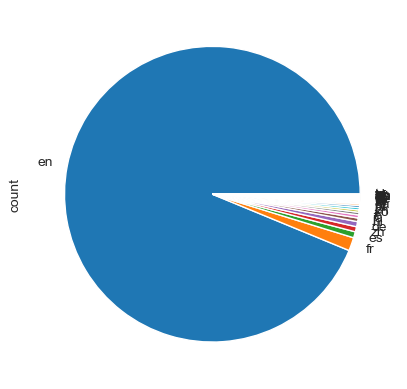

In [178]:
# language of movies

movies["original_language"].value_counts().plot(kind='pie')

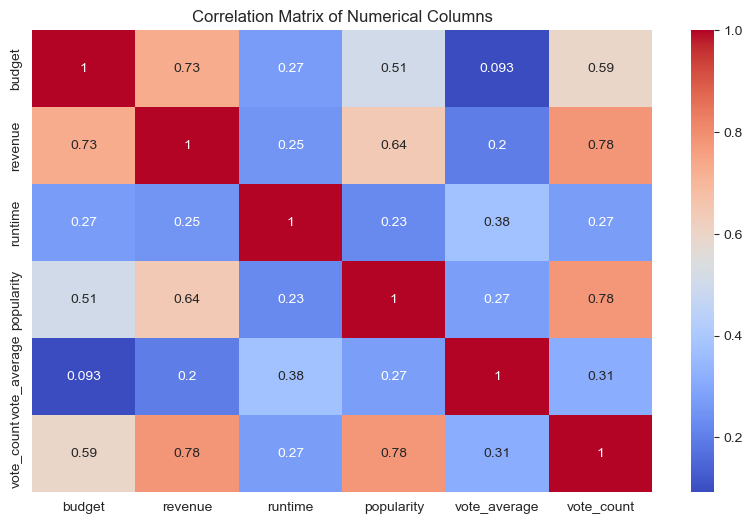

In [119]:
# Calculate correlation matrix
correlation_matrix = movies[['budget', 'revenue', 'runtime',"popularity", 'vote_average', 'vote_count']].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

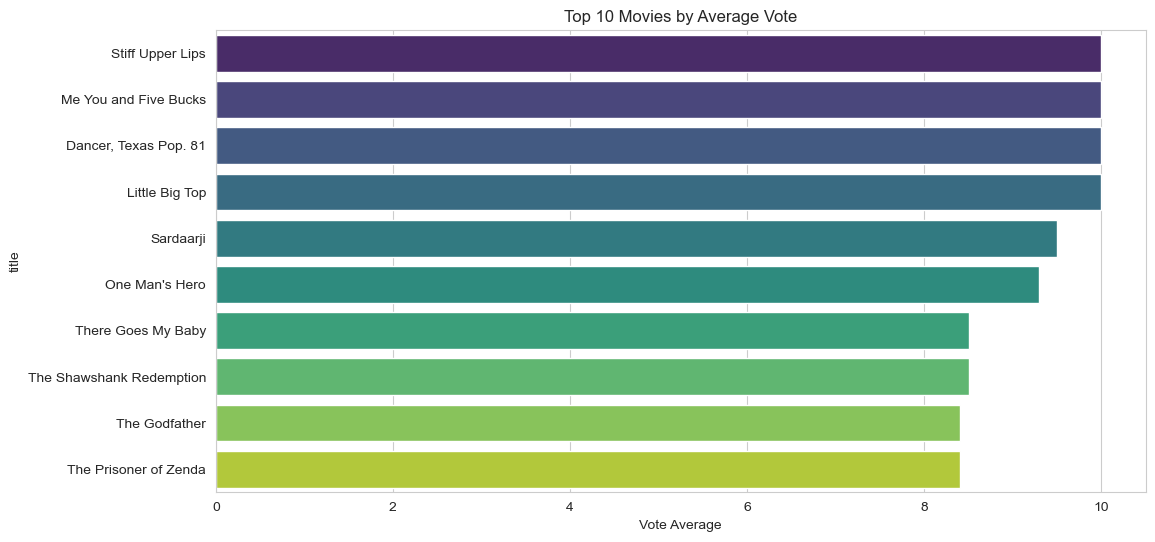

In [179]:
# Top 10 movies by vote average
top_movies = movies.sort_values(by='vote_average', ascending=False)[['title', 'vote_average']].head(10)

# Bar plot of top 10 movies by vote average
plt.figure(figsize=(12, 6))
sns.barplot(x='vote_average', y='title', data=top_movies, palette='viridis')
plt.title("Top 10 Movies by Average Vote")
plt.xlabel("Vote Average")
plt.show()


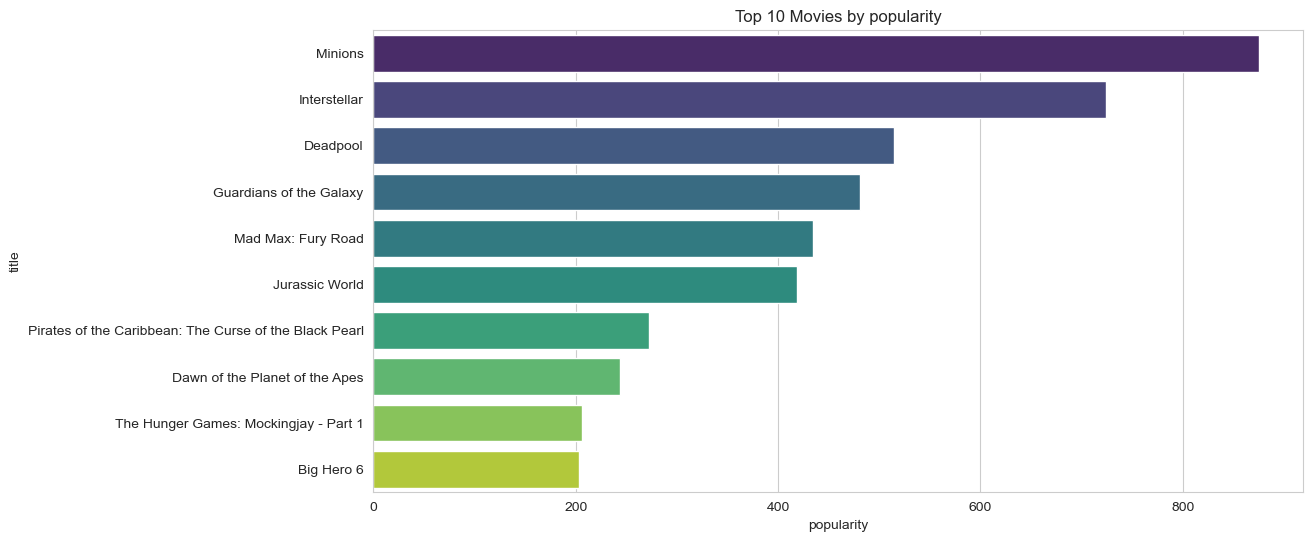

In [121]:
# Top 10 movies by popularity
top_movies = movies.sort_values(by='popularity', ascending=False)[['title', 'popularity']].head(10)

# Bar plot of top 10 movies by vote average
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='title', data=top_movies, palette='viridis')
plt.title("Top 10 Movies by popularity")
plt.xlabel("popularity")
plt.show()


In [122]:
# Extracting year and decade for the movies 

movies["release_date"] = pd.to_datetime(movies["release_date"], errors='coerce')


# Extract the year from 'release_date'
movies['year'] = movies['release_date'].dt.year

# Calculate the decade by subtracting year modulo 10
movies['decade'] = (movies['year'] // 10) * 10

In [123]:
movies['year'] = movies['year'].fillna(0).astype(int)
movies['decade'] = movies['decade'].fillna(0).astype(int)

In [124]:
movies[["year", 'decade']]

,year,decade
0,2009,2000
1,2007,2000
2,2015,2010
3,2012,2010
4,2012,2010
...,...,...
4804,1992,1990
4805,2011,2010
4806,2013,2010
4807,2012,2010


In [125]:
movies_per_year = movies.groupby('year').size().reset_index(name='movie_count')
movies_per_year = movies_per_year.drop(0)
movies_per_year = movies_per_year.sort_values(by="movie_count", ascending=False)[:20]

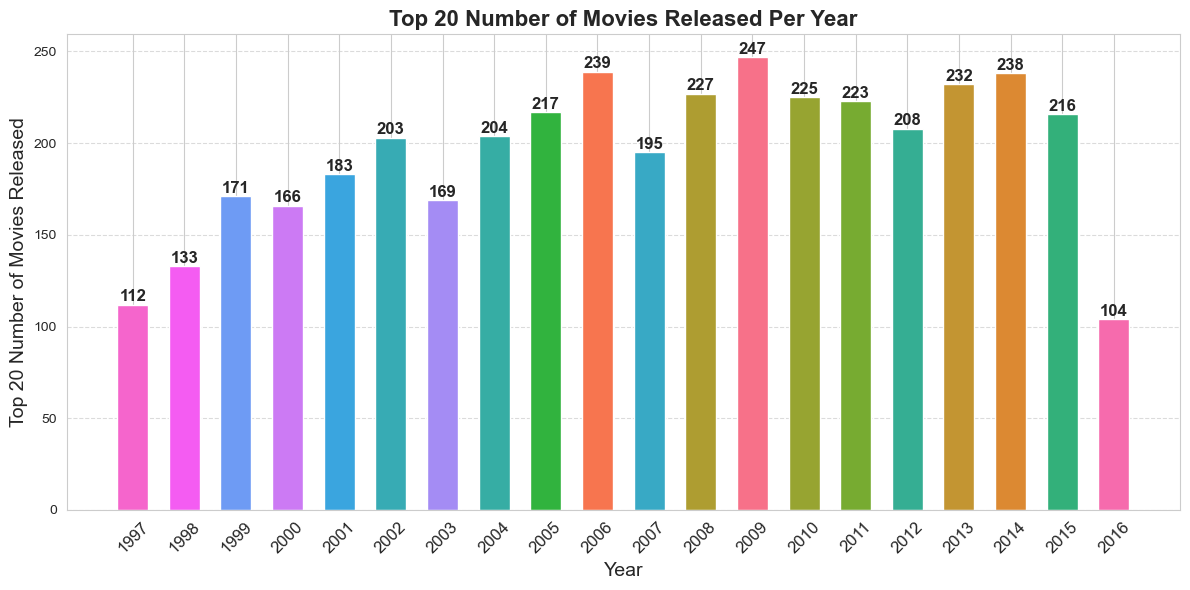

In [126]:
# Sort the dataframe by movie count and keep the top 20 years
top_20_movies_per_year = movies_per_year.sort_values(by='movie_count', ascending=False).head(20)

# Use seaborn style for aesthetics
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(top_20_movies_per_year))  # Use 'husl' color palette for distinct hues
bars = plt.bar(top_20_movies_per_year['year'], top_20_movies_per_year['movie_count'], color=colors, width=0.6)

# Add annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize plot labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Top 20 Number of Movies Released', fontsize=14)
plt.title('Top 20 Number of Movies Released Per Year', fontsize=16, fontweight='bold')

# Customize x-axis labels and their appearance
plt.xticks(top_20_movies_per_year['year'], rotation=45, fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to adjust labels and elements
plt.tight_layout()

# Display the plot
plt.show()

In [127]:
movies_per_decade = movies.groupby('decade').size().reset_index(name='movie_count')
movies_per_decade = movies_per_decade.drop(0)
movies_per_decade = movies_per_decade.sort_values(by="movie_count", ascending=False)
movies_per_decade

,decade,movie_count
10,2000,2050
11,2010,1447
9,1990,778
8,1980,280
7,1970,109
6,1960,72
5,1950,27
4,1940,25
3,1930,15
2,1920,4


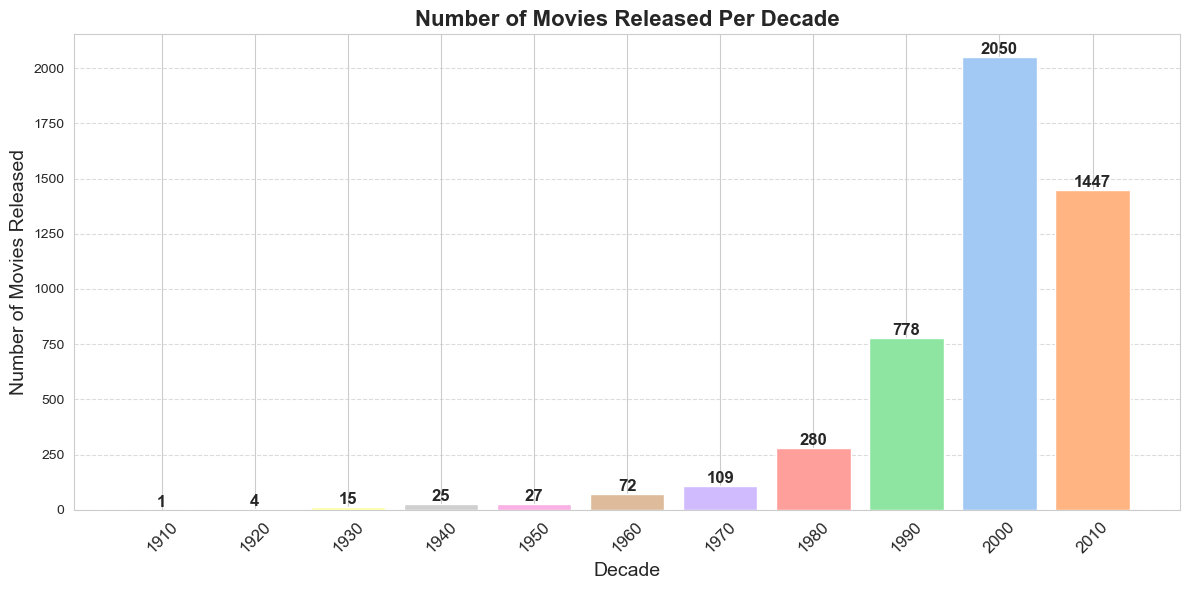

In [128]:
# Create the bar plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("pastel", len(movies_per_decade))  # Use pastel colors for bars
bars = plt.bar(movies_per_decade['decade'], movies_per_decade['movie_count'], color=colors, width=8)

# Add annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize plot labels and title
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)
plt.title('Number of Movies Released Per Decade', fontsize=16, fontweight='bold')

# Customize x-axis labels
plt.xticks(movies_per_decade['decade'], rotation=45, fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [129]:
# columns removed from dataset
# budget -> it's not relevent for the movie recommendation
# homepage -> not giving any important info
# original_language -> most of the movies are of same language
# spoken_languages - > same 
# production_companies -> we already have producer name in our crew name 
# production_countries - > 
# tagline -> beacuse we have many missing values
# original_title -> we already have one column with title name 
# popularity -> it mostly depends on the time of release 
# status - > most movies have same satuts-> released
# revenue - > we dont have accurate data about revenue 
# vote_average - > 
# vote_count - >
# 
movies.columns



Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew', 'year', 'decade'],
      dtype='object')

In [130]:
movies.sort_values(by="release_date" ,ascending=False)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,year,decade
4262,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",http://www.growingupsmithmovie.com,426469,[],en,Growing Up Smith,"In 1979, an Indian family moves to America wit...",0.710870,[],...,Released,It’s better to stand out than to fit in.,Growing Up Smith,7.4,7,426469,"[{""cast_id"": 4, ""character"": ""Smith Bhatnagar""...","[{""credit_id"": ""582e0bdfc3a368772600b6c1"", ""de...",2017,2010
3413,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,325373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 46...",en,Two Lovers and a Bear,Set in a small town near the North Pole where ...,3.139294,[],...,Released,NaN,Two Lovers and a Bear,6.8,27,325373,"[{""cast_id"": 0, ""character"": ""Roman"", ""credit_...","[{""credit_id"": ""572b7278c3a3684806002e6e"", ""de...",2016,2010
3307,8000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,374461,"[{""id"": 1650, ""name"": ""cook""}, {""id"": 6054, ""n...",en,Mr. Church,A unique friendship develops when a little gir...,7.828459,"[{""name"": ""Envision Media Arts"", ""id"": 19456},...",...,Released,He was the one person she could always count on.,Mr. Church,7.0,129,374461,"[{""cast_id"": 6, ""character"": ""Henry Church"", ""...","[{""credit_id"": ""5710041cc3a3684122000ee4"", ""de...",2016,2010
4726,8500000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxsearchlight.com/thebirthofanation/,339408,"[{""id"": 2831, ""name"": ""slavery""}]",en,The Birth of a Nation,"Nat Turner, a former slave in America, leads a...",9.452808,"[{""name"": ""Phantom Four"", ""id"": 423}, {""name"":...",...,Released,The Untold Story of Nat Turner,The Birth of a Nation,6.5,178,339408,"[{""cast_id"": 2, ""character"": ""Nat Turner"", ""cr...","[{""credit_id"": ""56af01149251417e2900b61c"", ""de...",2016,2010
3254,0,"[{""id"": 12, ""name"": ""Adventure""}]",http://www.focusfeatures.com/kicks,385736,"[{""id"": 3405, ""name"": ""blow job""}, {""id"": 1173...",en,Kicks,When his hard-earned kicks get snatched by a l...,3.467923,"[{""name"": ""Bystorm Films"", ""id"": 2903}, {""name...",...,Released,They aren't just shoes,Kicks,7.5,18,385736,"[{""cast_id"": 2, ""character"": ""Marlon"", ""credit...","[{""credit_id"": ""570f87d992514102b9002c1e"", ""de...",2016,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,905,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",de,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1.824184,"[{""name"": ""Nero Films"", ""id"": 4903}]",...,Released,NaN,Pandora's Box,7.6,45,905,"[{""cast_id"": 7, ""character"": ""Lulu"", ""credit_i...","[{""credit_id"": ""52fe428ac3a36847f8026e81"", ""de...",1929,1920
2644,92620000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,19,"[{""id"": 312, ""name"": ""man vs machine""}, {""id"":...",de,Metropolis,In a futuristic city sharply divided between t...,32.351527,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Released,There can be no understanding between the hand...,Metropolis,8.0,657,19,"[{""cast_id"": 10, ""character"": ""Maria"", ""credit...","[{""credit_id"": ""52fe420fc3a36847f8000c55"", ""de...",1927,1920
4667,245000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,3060,"[{""id"": 2504, ""name"": ""world war i""}, {""id"": 1...",en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...",...,Released,NaN,The Big Parade,7.0,21,3060,"[{""cast_id"": 23, ""character"": ""James Apperson""...","[{""credit_id"": ""52fe4381c3a36847f805922b"", ""de...",1925,1920
4598,385907,"[{""id"": 18, ""name"": ""Drama""}]",NaN,3059,"[{""id"": 279, ""name"": ""usa""}, {""id"": 2487, ""nam

In [131]:
# coulmns we selected for movie recommendation 

movies = movies[['movie_id','title','overview','year','decade', 'genres','keywords','cast','crew']]

In [132]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   year      4809 non-null   int32 
 4   decade    4809 non-null   int32 
 5   genres    4809 non-null   object
 6   keywords  4809 non-null   object
 7   cast      4809 non-null   object
 8   crew      4809 non-null   object
dtypes: int32(2), int64(1), object(6)
memory usage: 300.7+ KB


In [133]:
# checking for null values 

movies.isna().sum()

movie_id    0
title       0
overview    3
year        0
decade      0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [134]:
# because we have only 3 columns with null values we can drop them.

movies.dropna(inplace=True)

In [135]:
import ast

In [136]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [137]:
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [141]:
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(convert)
movies['cast'] = movies['cast'].apply(lambda x:x[0:8])


movies.head()

,movie_id,title,overview,year,decade,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009,2000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007,2000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,2015,2010,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,2012,2010,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...",2012,2010,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [142]:

positions = [
    "Director",
    "Producer",
    "Screenwriter",
    "Production Designer",
    "Editor",

]
def fetch_crew(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] in positions:
            L.append(i['name'])
    return L 

In [143]:
movies["crew"] = movies["crew"].apply(fetch_crew)

In [144]:
movies.head(2)

,movie_id,title,overview,year,decade,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009,2000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, James Cameron, James Camer..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007,2000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Stephen E...."


In [145]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [148]:

movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
movies['year'] = movies['year'].astype("str")
movies['decade'] = movies['decade'].astype("str")

In [149]:

movies.head()

,movie_id,title,overview,year,decade,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009,2000,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[StephenE.Rivkin, JamesCameron, JamesCameron, ..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007,2000,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[GoreVerbinski, JerryBruckheimer, StephenE.Riv..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,2015,2010,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[SamMendes, LeeSmith, BarbaraBroccoli, Michael..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,2012,2010,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...","[CharlesRoven, ChristopherNolan, ChristopherNo..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...",2012,2010,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[AndrewStanton, ColinWilson, EricZumbrunnen, J..."


In [153]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies['year'] = movies['year'].apply(lambda x:x.split())
movies['decade'] = movies['decade'].apply(lambda x:x.split())

In [154]:
movies.head()

,movie_id,title,overview,year,decade,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",[2009],[2000],"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[StephenE.Rivkin, JamesCameron, JamesCameron, ..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",[2007],[2000],"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[GoreVerbinski, JerryBruckheimer, StephenE.Riv..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",[2015],[2010],"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[SamMendes, LeeSmith, BarbaraBroccoli, Michael..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",[2012],[2010],"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...","[CharlesRoven, ChristopherNolan, ChristopherNo..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",[2012],[2010],"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[AndrewStanton, ColinWilson, EricZumbrunnen, J..."


In [155]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew'] + movies['year'] + movies['decade']

In [158]:

new = movies.drop(columns=['overview','genres','keywords','cast','crew', "year", "decade"])
new.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [159]:

new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [160]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [161]:
vector = cv.fit_transform(new['tags']).toarray()
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [162]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vector)

similarity

array([[1.        , 0.13093073, 0.04588315, ..., 0.02085144, 0.02294157,
        0.02208631],
       [0.13093073, 1.        , 0.05006262, ..., 0.02275079, 0.        ,
        0.02409813],
       [0.04588315, 0.05006262, 1.        , ..., 0.04783649, 0.02631579,
        0.        ],
       ...,
       [0.02085144, 0.02275079, 0.04783649, ..., 1.        , 0.09567297,
        0.04605313],
       [0.02294157, 0.        , 0.02631579, ..., 0.09567297, 1.        ,
        0.05066946],
       [0.02208631, 0.02409813, 0.        , ..., 0.04605313, 0.05066946,
        1.        ]])

In [163]:
similarity[744]

array([0.05252257, 0.05730683, 0.06024752, ..., 0.05475857, 0.03012376,
       0.        ])

In [164]:

def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index] )),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [165]:
recommend('The Dark Knight Rises')

The Dark Knight
Batman Begins
Batman
Batman Returns
Batman


In [113]:
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(new['tags']).toarray()

In [167]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
def recommend2(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(tfidf_matrix[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [169]:
recommend2('The Dark Knight Rises')

Anastasia
The Greatest Game Ever Played
Safe House
Top Hat
The Man from Snowy River
